In [1]:
import tensorflow.keras as keras
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.models import Model

In [2]:
# PREVIOUS 'arena scrape' NOTEBOOK SAVED ALL IMAGE METADATA TO JSON FILE
# OPEN JSON FILE TO INITIATE PROCESS OF IDENTIFYING IMAGES TO ANALYZE

import json

imageDir = {}
with open('./Desktop/arenaui/imageDir.json') as json_file:
    imageDir = json.load(json_file)
print(len(imageDir))

5227


In [3]:
# INIT NEURAL NET
# use pretrained vgg16 - convolutional network for classification and detection
model = keras.applications.VGG16(weights='imagenet', include_top=True)
feat_extractor = Model(inputs=model.input, outputs=model.get_layer('fc2').output)
#feat_extractor.summary()

In [4]:
# GET EACH IMAGE FROM DIRECTORY, AND CALCULATE FEATURES
from PIL import Image

features = []
numFailed = 0
successImgDir = {}

images = []

filePrefix = './Desktop/arenaui/images/'
fileSuffix = '.jpg'

print('start')
for i, imgInput in enumerate(imageDir):

    imgData = imageDir[imgInput]
   
    if i % 200 == 0:
        print(str(i))
        
    try:      
        image_path =  filePrefix + str(imgInput) + fileSuffix
        #loads image and resizes to res
        img = image.load_img(image_path, target_size=model.input_shape[1:3])

        #adds 3 channels for rgb to image
        x = image.img_to_array(img) 

        # wrap array in array reshape it so it's one image per array item
        x = np.expand_dims(x, axis=0) 

        # subtracts mean rgb channels of dataset (model trained diff)
        x = preprocess_input(x)

        # extracts 4096 features from image (total res is 50k so it is reduced)
        feat = feat_extractor.predict(x)[0] 
        features.append(feat)
        
        successImgDir[imgInput] = imgData
        images.append(image_path)
    except:
        numFailed += 1

print('done')
print('failed', numFailed)
print(len(features))

start
0
200
400
600
800
1000
1200
1400
1600
1800
2000
2200
2400
2600
2800
3000
3200
3400
3600
3800
4000
4200
4400
4600
4800
5000
5200
done
failed 581
4646


In [5]:
# UPDATE IMAGE METADATA TO ONLY CONTAIN THE IMAGES THAT UNDERWENT SUCCESSFUL FEATURE EXTRACTION
import json

with open('./Desktop/arenaui/imageDir.json', 'w') as outfile:
    json.dump(successImgDir, outfile)
print('done')

done


In [6]:
# DIMENSIONAL REDUCTION

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
scaled = ss.fit_transform(features)

import umap
embedding = umap.UMAP().fit_transform(scaled)

#recale from 0 to 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(embedding)
embedding_scaled = scaler.transform(embedding)

print('done')

done


In [20]:
# HELPER FUNCTIONS
filePrefix = './Desktop/arenaui/images/'
fileSuffix = '.jpg'

import os

def getIdFromIndex(index):
    file = images[index]
    fileWithExt = os.path.basename(file)
    fileId = str(os.path.splitext(fileWithExt)[0])
    fileMeta = imageDir.get(fileId)
    return {'key': fileId, 'val': fileMeta}

def getImageFromId(id):
    return filePrefix + str(id) + fileSuffix


In [10]:
# CALCULATE NEIGHBORS FOR EACH IMAGE

from sklearn.neighbors import NearestNeighbors

nbrs = NearestNeighbors(n_neighbors=10, metric='cosine').fit(embedding_scaled)
distances, indices = nbrs.kneighbors(embedding_scaled)

neighbor_objs = {}
for imgIndex, imgNeighbors in enumerate(indices):
    neighbor_obj = []
    print(imgIndex)
    for neighborIndex, neighborIndexArray in enumerate(imgNeighbors):
        neighborString = 'n' + str(neighborIndex+1)
        neighbor_obj.append( getIdFromIndex(neighborIndexArray).get('key'));
    neighbor_objs[getIdFromIndex(imgIndex).get('key')] = neighbor_obj
print('done')
print(len(neighbor_objs))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

2233
2234
2235
2236
2237
2238
2239
2240
2241
2242
2243
2244
2245
2246
2247
2248
2249
2250
2251
2252
2253
2254
2255
2256
2257
2258
2259
2260
2261
2262
2263
2264
2265
2266
2267
2268
2269
2270
2271
2272
2273
2274
2275
2276
2277
2278
2279
2280
2281
2282
2283
2284
2285
2286
2287
2288
2289
2290
2291
2292
2293
2294
2295
2296
2297
2298
2299
2300
2301
2302
2303
2304
2305
2306
2307
2308
2309
2310
2311
2312
2313
2314
2315
2316
2317
2318
2319
2320
2321
2322
2323
2324
2325
2326
2327
2328
2329
2330
2331
2332
2333
2334
2335
2336
2337
2338
2339
2340
2341
2342
2343
2344
2345
2346
2347
2348
2349
2350
2351
2352
2353
2354
2355
2356
2357
2358
2359
2360
2361
2362
2363
2364
2365
2366
2367
2368
2369
2370
2371
2372
2373
2374
2375
2376
2377
2378
2379
2380
2381
2382
2383
2384
2385
2386
2387
2388
2389
2390
2391
2392
2393
2394
2395
2396
2397
2398
2399
2400
2401
2402
2403
2404
2405
2406
2407
2408
2409
2410
2411
2412
2413
2414
2415
2416
2417
2418
2419
2420
2421
2422
2423
2424
2425
2426
2427
2428
2429
2430
2431
2432


3974
3975
3976
3977
3978
3979
3980
3981
3982
3983
3984
3985
3986
3987
3988
3989
3990
3991
3992
3993
3994
3995
3996
3997
3998
3999
4000
4001
4002
4003
4004
4005
4006
4007
4008
4009
4010
4011
4012
4013
4014
4015
4016
4017
4018
4019
4020
4021
4022
4023
4024
4025
4026
4027
4028
4029
4030
4031
4032
4033
4034
4035
4036
4037
4038
4039
4040
4041
4042
4043
4044
4045
4046
4047
4048
4049
4050
4051
4052
4053
4054
4055
4056
4057
4058
4059
4060
4061
4062
4063
4064
4065
4066
4067
4068
4069
4070
4071
4072
4073
4074
4075
4076
4077
4078
4079
4080
4081
4082
4083
4084
4085
4086
4087
4088
4089
4090
4091
4092
4093
4094
4095
4096
4097
4098
4099
4100
4101
4102
4103
4104
4105
4106
4107
4108
4109
4110
4111
4112
4113
4114
4115
4116
4117
4118
4119
4120
4121
4122
4123
4124
4125
4126
4127
4128
4129
4130
4131
4132
4133
4134
4135
4136
4137
4138
4139
4140
4141
4142
4143
4144
4145
4146
4147
4148
4149
4150
4151
4152
4153
4154
4155
4156
4157
4158
4159
4160
4161
4162
4163
4164
4165
4166
4167
4168
4169
4170
4171
4172
4173


In [11]:
# SAVE MAPPING OF IMAGE TO NEIGHBORS TO JSON (TO BE USED BY WEB UI)

import json

with open('./Desktop/arenaui/nbrs.json', 'w') as outfile:
    json.dump(neighbor_objs, outfile)
print('done')

done


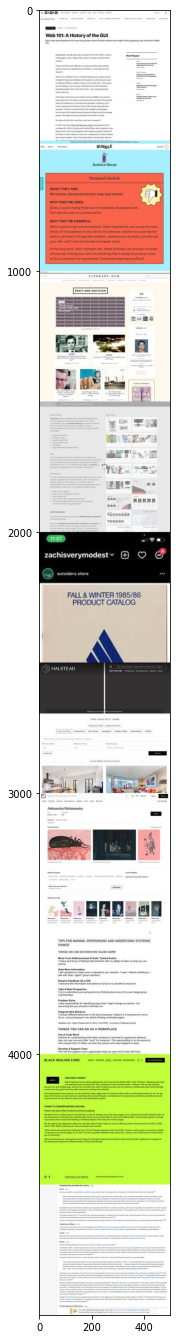

In [15]:
# VISUALIZE ONE RANDOM SET OF NEIGHBORS FOR TESTING

import random
from matplotlib import pyplot as plt
from random import randrange

randImageId = random.choice(list(imageDir.items()))[0]
nbrs = neighbor_objs[str(randImageId)]

nbrImgs = []
for key in nbrs:
    nbrImgs.append(getImageFromId(key))

img_width = 500
grid_image = Image.new('RGB', (img_width, len(distances[0])*500), (0,0,0,255))

ypos = 0

for fileName in nbrImgs:
    currImg = Image.open(fileName)
    img_ar = currImg.width / currImg.height
    currImg = currImg.resize((img_width, int(img_width / img_ar)), Image.ANTIALIAS)
    grid_image.paste(currImg, (0, ypos))
    ypos += currImg.width
    
    
plt.figure(figsize = (32,24))
plt.imshow(grid_image)
    


In [16]:
# PREP FOR CLUSTER
from sklearn.cluster import MiniBatchKMeans
sum_squared = []
cluster_size = min(int(len(images)/5), 30)
cluster_size = 20
K = range(1, cluster_size)

for i in K:
    kmeans = MiniBatchKMeans(n_clusters=i)
    kmeans.fit(scaled)
    sum_squared.append(kmeans.inertia_)
    
print('done')


done


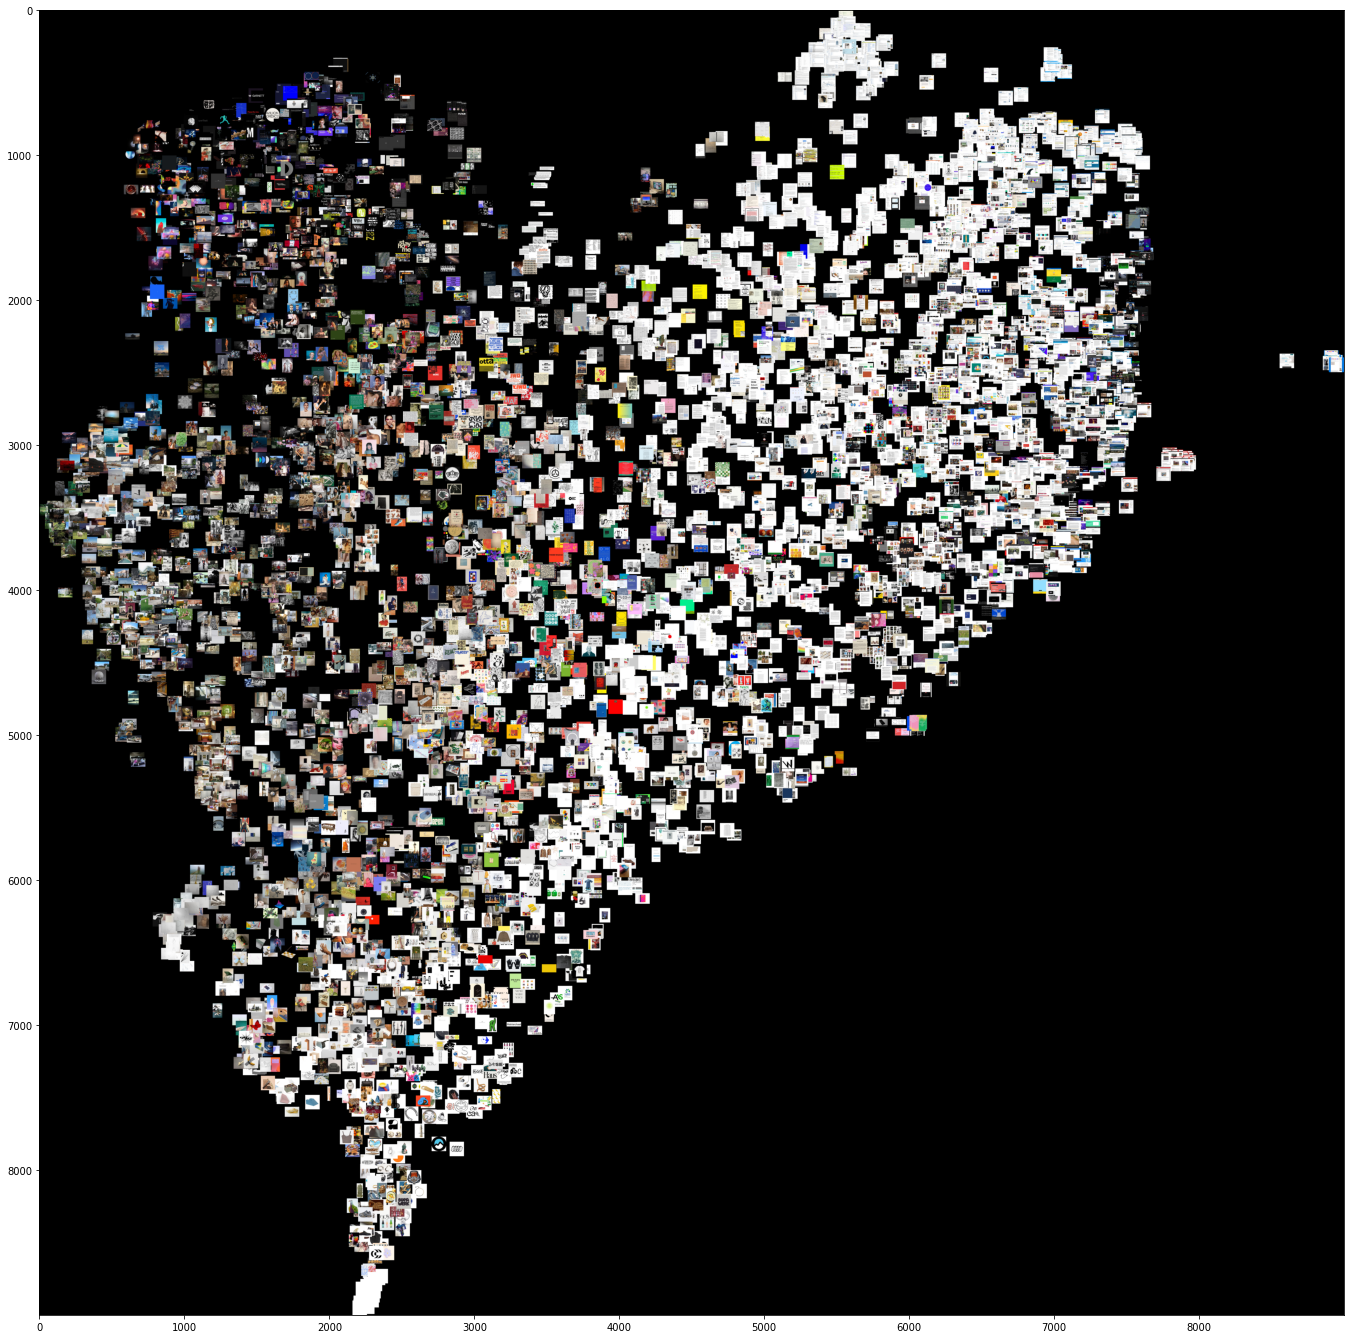

In [17]:
# CLUSTERED IMAGE

from PIL import Image
import matplotlib.pyplot as plt

width = 9000
height = 9000
max_dim = 100

full_image = Image.new('RGB', (width, height), (0,0,0,255))
for img, pos in zip(images, embedding_scaled):
    x = pos[0]
    y = pos[1]
    tile = Image.open(img)
    rs = max(1, tile.width/max_dim, tile.height/max_dim)
    tile = tile.resize( (int(tile.width/rs), int(tile.height/rs)) , Image.ANTIALIAS)
    full_image.paste(tile, (int((width-max_dim)*x), int((height-max_dim)*y)), mask=tile.convert('RGBA'))
    
plt.figure(figsize = (32,24))
plt.imshow(full_image)

#download image

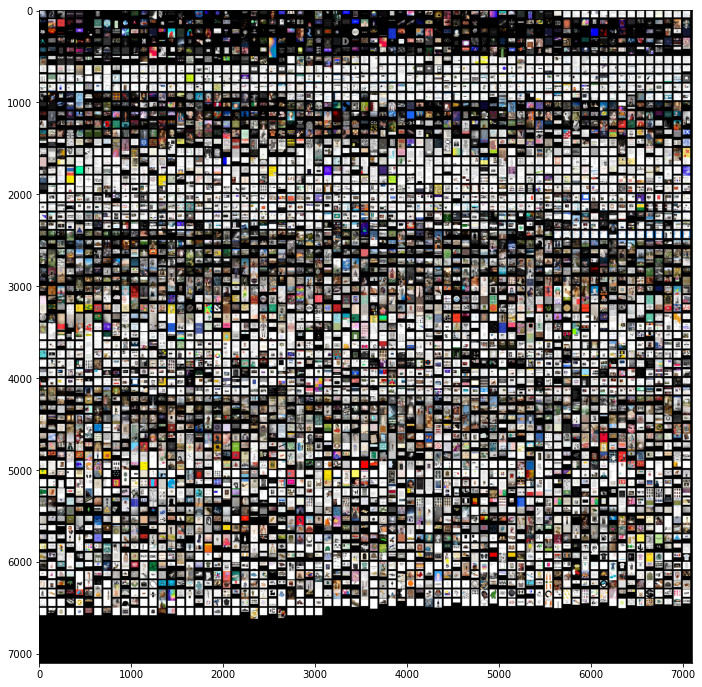

In [18]:
# SORTED GRID IMAGE

import rasterfairy
nx = 71
ny = 71

grid_assignment = rasterfairy.transformPointCloud2D(embedding, target=(nx, ny))

tile_width = 100
tile_height = 100

full_width = tile_width * nx
full_height = tile_height * ny
aspect_ratio = tile_width / tile_height

grid_image = Image.new('RGB', (full_width, full_height), (0, 0, 0, 255))

for img, grid_pos in zip(images, grid_assignment[0]):
    idx_x, idx_y = grid_pos
    x, y = tile_width * idx_x, tile_height * idx_y
    tile = Image.open(img)
    tile_ar = tile.width / tile.height
    tile = tile.resize((int(0.8 * tile_width), int(0.8 * tile_height / tile_ar)), Image.ANTIALIAS)
    grid_image.paste(tile, (int(x), int(y)))

plt.figure(figsize = (16,12))
plt.imshow(grid_image)


full_image.save('./Desktop/arenascatter.jpg')
grid_image.save('./Desktop/arenagrid.jpg')